In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

#Exploratory Data Analysis


In [2]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(

The dataset contains 200 customers, each represented by five columns: CustomerID, Gender, Age, Annual Income (k$), and Spending Score (1–100). All columns are complete — there are no missing values or duplicates, which means the data is clean and ready for analysis.

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


The dataset shows that customers are mostly adults, with ages ranging from 18 to 70 and an average of about 39 years. The average annual income is around $60,000, with a wide range from 15,000 to 137,000. The spending score averages 50, showing that some customers spend very little while others spend a lot. Overall, the data shows diverse age, income, and spending patterns, making it suitable for customer segmentation.

In [13]:
print(df.isnull().values.any())

False


There are no missing values in the dataset

#Visualization

In [8]:
# rename the Annual Income and Spending Score column
df = df.rename(columns={"Annual Income (k$)": "Annual Income"})
df = df.rename(columns={"Spending Score (1-100)": "Spending Score"})
df = df.drop(columns = "CustomerID")
df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


/tmp/ipython-input-639541483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


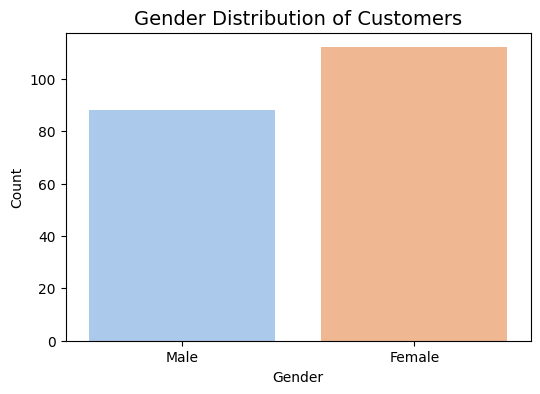

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title("Gender Distribution of Customers", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


The chart shows that there are more female customers than male customers in the mall. This means women make up a larger portion of the customer base. It suggests that the mall’s products or environment may appeal more to female shoppers, so marketing campaigns or promotions could be designed to target this group more effectively.

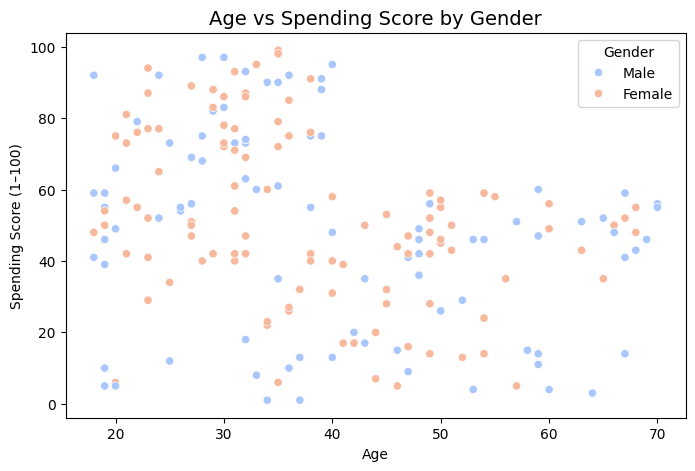

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Spending Score', hue='Gender', palette='coolwarm')
plt.title("Age vs Spending Score by Gender", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Spending Score (1–100)")
plt.show()


The scatter plot shows the relationship between customers’ age and spending score by gender. From the graph, younger customers (around 18–30 years old) usually have higher spending scores, meaning they like to shop more and spend on fashion, entertainment, or lifestyle products. Middle-aged customers (35–55 years old) have average spending scores, showing they are more selective and practical shoppers. Older customers (above 55 years old) tend to have lower spending scores, which means they visit the mall less often or spend carefully.

From a business point of view, this information helps the mall make better marketing plans. The mall can focus on promoting trendy items and events for young shoppers, create family promotions for middle-aged customers, and offer discounts or relaxing places for older visitors. By understanding how different age groups and genders spend their money, the mall can improve sales, plan better promotions, and build stronger customer relationships.

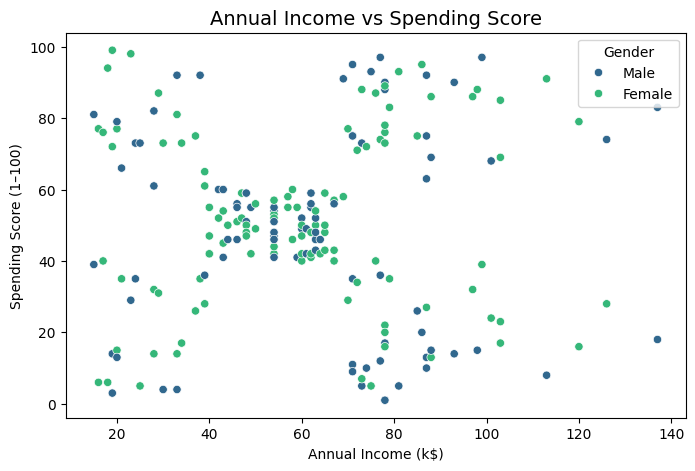

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Annual Income', y='Spending Score', hue='Gender', palette='viridis')
plt.title("Annual Income vs Spending Score", fontsize=14)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.show()


The scatter plot shows the relationship between customers’ annual income and their spending score. It can be seen that people with very high or very low income have different spending behaviors — some with high income spend a lot, while others spend very little. On the other hand, many customers with middle income (around 40k–70k) have average spending scores. This means that spending habits are not only influenced by income level; some customers may prefer to save, while others like to shop more for enjoyment. Both males and females are spread across all income and spending levels, showing that gender does not have a strong effect on spending score.

For the business, this information helps the mall understand that high-income customers do not always spend the most, so marketing should focus on customer interests and lifestyle, not only income. Customers with high income and high spending scores can be targeted with premium offers, while high-income but low-spending customers may need special loyalty programs to encourage more purchases. Meanwhile, middle-income shoppers with moderate spending can be reached with discounts and family deals. These insights can help the mall design better marketing strategies, improve sales, and increase customer loyalty.

#Encoding

In [18]:
# Encode the Gender column
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df.head()

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


#Scaling


In [32]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

# --- Select only relevant columns ---
df = df[['Gender', 'Age', 'Annual Income', 'Spending Score']]

# --- Apply Min-Max Scaling ---
scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(
    scaler.fit_transform(df),
    columns=['Gender', 'Age', 'Annual Income', 'Spending Score']
)


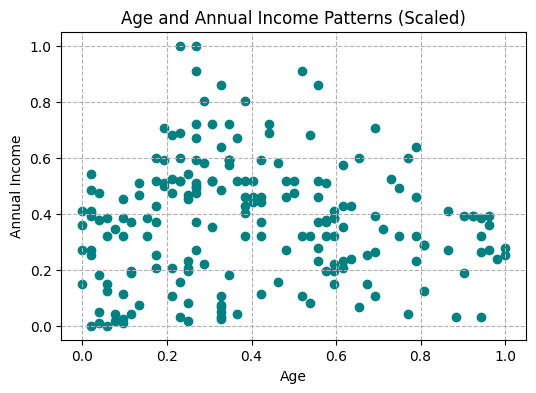

In [44]:
# --- Visualization ---
plt.figure(figsize=(6,4))
plt.scatter(df_minmax_scaled['Age'],
            df_minmax_scaled['Annual Income'],
            color='teal')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age and Annual Income Patterns (Scaled)')
plt.grid(axis='both', linestyle='--')
plt.show()

After applying Min-Max scaling, the visualization shows the relationship between customers’ age and annual income in a normalized form, where both values range between 0 and 1. The scatter plot helps to easily see overall patterns without the effect of different measurement units. From the scaled data, it appears that younger customers (lower age values) are spread across various income levels, while older customers (higher age values) tend to be grouped around middle or lower income values. This means that income does not increase linearly with age — some young people may already have high income, while some older customers may earn less or have more stable income levels.

From a business perspective, scaling makes it easier to compare age and income fairly, especially when performing machine learning or clustering later. It shows that income levels are not only determined by age, so marketing strategies should not focus only on older or higher-income customers. The mall can use this insight to design targeted offers for different age and income combinations — for example, promotions for young professionals with high income or loyalty rewards for older, stable-income customers. This step also prepares the data for further analysis like segmentation to find customer groups more accurately.

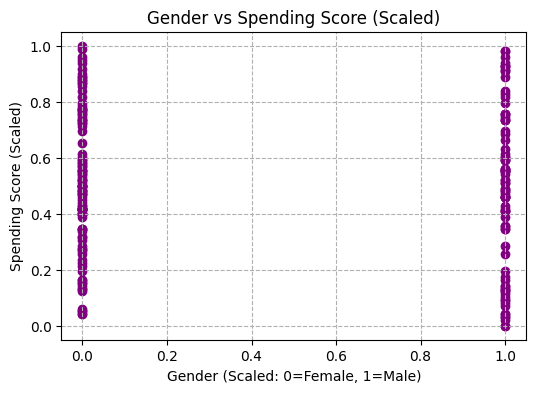

In [39]:
plt.figure(figsize=(6,4))
plt.scatter(df_minmax_scaled['Gender'], df_minmax_scaled['Spending Score'], color='purple')
plt.xlabel('Gender (Scaled: 0=Female, 1=Male)')
plt.ylabel('Spending Score (Scaled)')
plt.title('Gender vs Spending Score (Scaled)')
plt.grid(axis='both', linestyle='--')
plt.show()


The visualization shows the relationship between gender and spending score after applying Min-Max scaling, where gender is scaled as 0 for female and 1 for male, and spending score is normalized between 0 and 1. From the scatter plot, both male and female customers are spread widely across all spending score levels, meaning that gender alone does not strongly determine how much a customer spends. However, there might be a slightly higher concentration of females (0) with higher spending scores, suggesting that female customers could be more active or willing to spend more at the mall compared to males.

From a business perspective, this means marketing strategies should not rely only on gender but instead combine it with other factors like age or income for better targeting. However, since female customers may have slightly higher spending behavior, businesses can focus on creating promotions that appeal to them, such as fashion, beauty, or lifestyle offers. Meanwhile, to engage male customers, the mall can introduce technology or sports-related promotions. Overall, scaling helps make the data easier to compare across features, supporting more accurate segmentation and marketing analysis.

#K-Means Clustering


In [40]:
from sklearn.cluster import KMeans

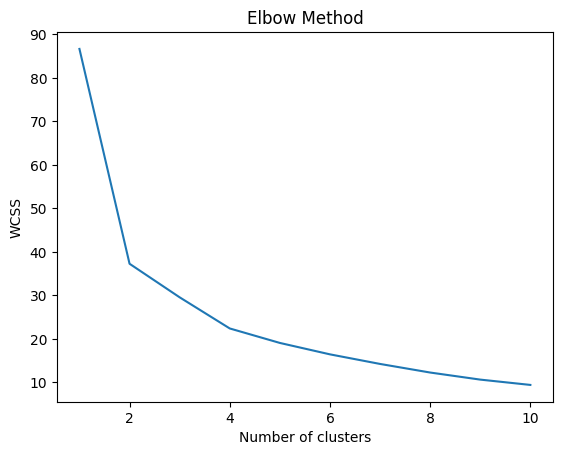

In [41]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_minmax_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters       WCSS
0                   1  86.681482
1                   2  37.272272
2                   3  29.552858
3                   4  22.390960
4                   5  19.060907
5                   6  16.434553
6                   7  14.229306
7                   8  12.253159
8                   9  10.625832
9                  10   9.403891


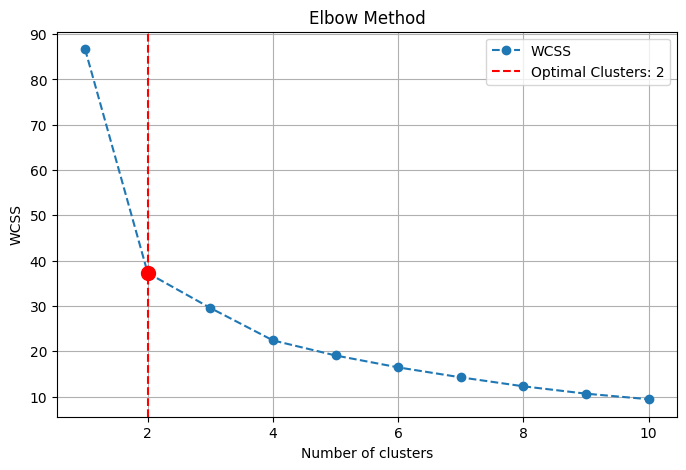

The optimal number of clusters is: 2


In [43]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [48]:
# Fit K-Means to the data with the optimal number of K cluster = 2
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_minmax_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Gender,Age,Annual Income,Spending Score,KMeans_Cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,1
3,0,23,16,77,1
4,0,31,17,40,1


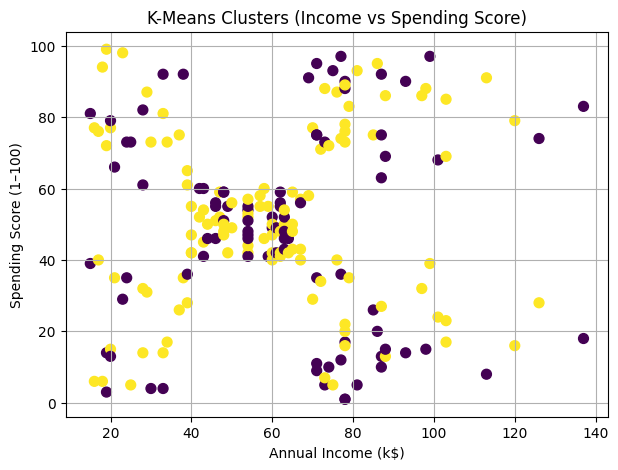

In [49]:
plt.figure(figsize=(7,5))
plt.scatter(df['Annual Income'], df['Spending Score'],
            c=df['KMeans_Cluster'], cmap='viridis', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.title('K-Means Clusters (Income vs Spending Score)')
plt.grid(True)
plt.show()


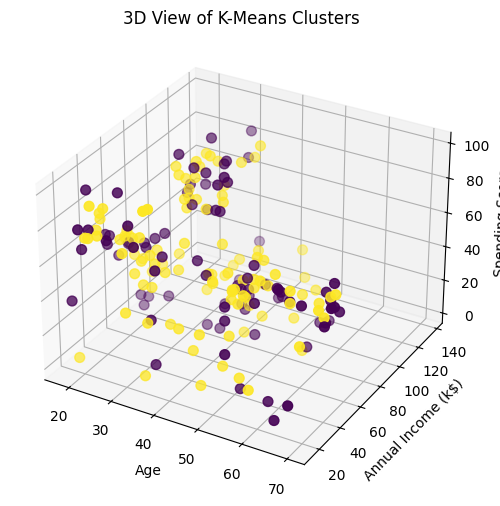

In [50]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income'], df['Spending Score'],
           c=df['KMeans_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')
ax.set_title('3D View of K-Means Clusters')
plt.show()


In [52]:
# Numeric summary: Age, Annual Income, Spending Score
cluster_numeric = df.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income': ['mean', 'min', 'max'],
    'Spending Score': ['mean', 'min', 'max']
})

# Gender summary: mode (most common gender)
cluster_gender = df.groupby('KMeans_Cluster')['Gender'].agg(lambda x: x.mode()[0])

# Combine numeric and gender summaries
cluster_profile = cluster_numeric.copy()
cluster_profile[('Gender', 'mode')] = cluster_gender

# Rename index for clarity
cluster_profile = cluster_profile.rename_axis('Cluster')
cluster_profile


Age         Annual Income          Spending Score          \
              mean min max          mean min  max           mean min max   
Cluster                                                                    
0        39.806818  18  70     62.227273  15  137      48.511364   1  97   
1        38.098214  18  68     59.250000  16  126      51.526786   5  99   

        Gender  
          mode  
Cluster         
0            1  
1            0

#Managerial Implications Based on the Three Clusters

**Cluster 0 – Mid-Age / Higher Income Male Group**

Profile:

*   Average age: around 40 years old, with a wide range (18–70).
*   Annual income is relatively high (~$62K average).
*   Spending score is moderate (~48), meaning balanced spending behavior.
*   Mostly male customers (mode = 1).

Managerial Implications:
*   These are financially stable professionals who spend carefully but have good purchasing power.
*   Promote premium but practical products (e.g., quality electronics, lifestyle upgrades).
*   Use email marketing, loyalty programs, or membership offers to retain them.
*   Marketing messages should highlight value, reliability, and long-term benefits.

**Cluster 1 – Mid-Age / Moderate Income Female Group**

Profile:


*   Average age: around 38 years old, slightly younger than Cluster 0.

*   Annual income is slightly lower (~$59K average).
*   Spending score is a bit higher (~52), showing they are more willing to spend.

*   Mostly female customers (mode = 0).

Managerial Implications:

*   These customers are social shoppers who enjoy spending on lifestyle, fashion, or personal care.

*   Target them with seasonal promotions, loyalty rewards, and social media campaigns.
*   Use visual and emotional marketing (e.g., Instagram, influencers).


*   Offer bundle deals or discounts to encourage repeat purchases and brand loyalty.
